<a href="https://colab.research.google.com/github/21WH1A0221/CreditCard_Fraud_Detection/blob/main/frosthack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import zipfile
# Specify the ZIP file path
zip_file_path = '/content/drive/MyDrive/archive (2).zip'
# Extract the ZIP archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/extracted_zip')
# Now you can read the CSV files separately
train_data = pd.read_csv('/content/drive/MyDrive/extracted_zip/fraudTrain.csv')
test_data = pd.read_csv('/content/drive/MyDrive/extracted_zip/fraudTest.csv')

In [ ]:
train_data = train_data.iloc[:, 1:]
test_data = test_data.iloc[:, 1:]

In [ ]:
train_data.head()
test_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [ ]:
train_data.describe()
test_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [ ]:
train_data.corr()
test_data.corr()

<ipython-input-8-c98610c01122>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()
<ipython-input-8-c98610c01122>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_data.corr()


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
cc_num,1.000000,0.001963,0.041610,-0.057512,-0.048783,-0.009414,-0.000810,-0.057183,-0.048818,-0.001540
amt,0.001963,1.000000,0.002310,0.002339,-0.002046,0.002760,-0.000974,0.002404,-0.002053,0.182267
zip,0.041610,0.002310,1.000000,-0.115173,-0.909942,0.075571,0.001395,-0.114809,-0.909117,-0.002271
lat,-0.057512,0.002339,-0.115173,1.000000,-0.012892,-0.152666,0.000301,0.993557,-0.012831,0.005863
long,-0.048783,-0.002046,-0.909942,-0.012892,1.000000,-0.051524,-0.001460,-0.012551,0.999115,-0.000972
city_pop,-0.009414,0.002760,0.075571,-0.152666,-0.051524,1.000000,-0.000740,-0.151703,-0.051489,-0.004910
unix_time,-0.000810,-0.000974,0.001395,0.000301,-0.001460,-0.000740,1.000000,0.000365,-0.001485,-0.013066
merch_lat,-0.057183,0.002404,-0.114809,0.993557,-0.012551,-0.151703,0.000365,1.000000,-0.012496,0.005812
merch_long,-0.048818,-0.002053,-0.909117,-0.012831,0.999115,-0.051489,-0.001485,-0.012496,1.000000,-0.001060
is_fraud,-0.001540,0.182267,-0.002271,0.005863,-0.000972,-0.004910,-0.013066,0.005812,-0.001060,1.000000


In [ ]:
print(train_data.shape)
print(test_data.shape)

(1296675, 22)
(555719, 22)


<ipython-input-10-b38da38cf333>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr())
<ipython-input-10-b38da38cf333>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test_data.corr())


<Axes: >

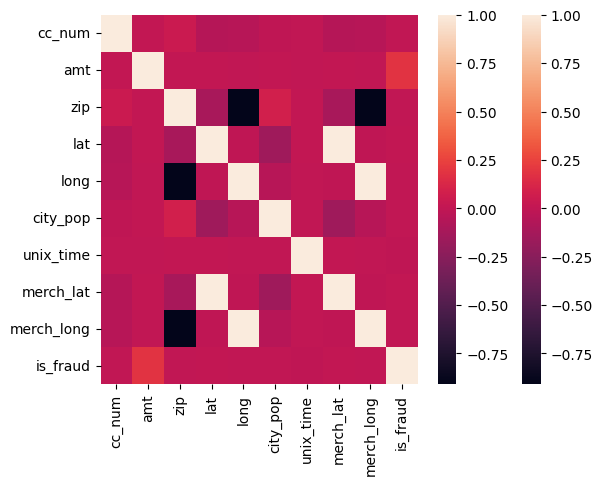

In [ ]:
sns.heatmap(train_data.corr())
sns.heatmap(test_data.corr())

In [ ]:
# Determine number of fraud cases in dataset
fraud = train_data[train_data['is_fraud'] == 1]
valid = train_data[train_data['is_fraud'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(train_data[train_data['is_fraud'] == 1])))
print('Valid Transactions: {}'.format(len(train_data[train_data['is_fraud'] == 0])))

0.005822355331224998
Fraud Cases: 7506
Valid Transactions: 1289169


In [ ]:
# Determine number of fraud cases in dataset
fraud = test_data[test_data['is_fraud'] == 1]
valid = test_data[test_data['is_fraud'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(test_data[test_data['is_fraud'] == 1])))
print('Valid Transactions: {}'.format(len(test_data[test_data['is_fraud'] == 0])))

0.003874820710510248
Fraud Cases: 2145
Valid Transactions: 553574


In [ ]:
print('Amount details of the fraudulent transaction')
fraud['amt'].describe()

Amount details of the fraudulent transaction


count    2145.000000
mean      528.356494
std       392.747594
min         1.780000
25%       214.510000
50%       371.940000
75%       907.770000
max      1320.920000
Name: amt, dtype: float64

<ipython-input-14-132e21d571f0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train_data.corr()


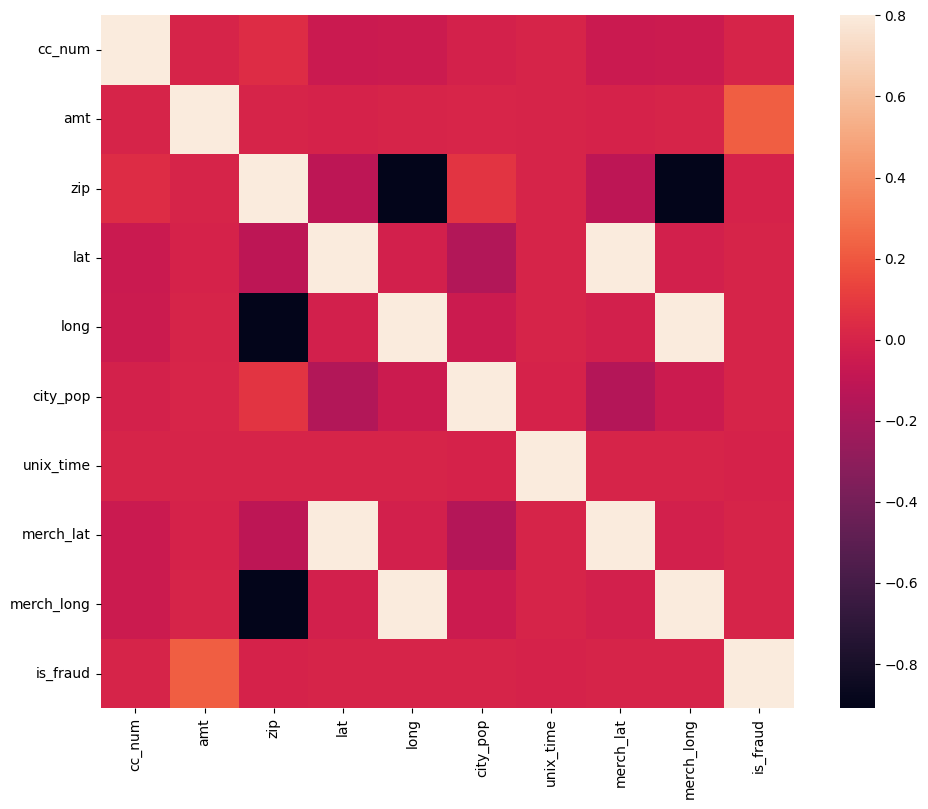

In [ ]:
corrmat = train_data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.show()

<ipython-input-15-a38e888925ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = test_data.corr()


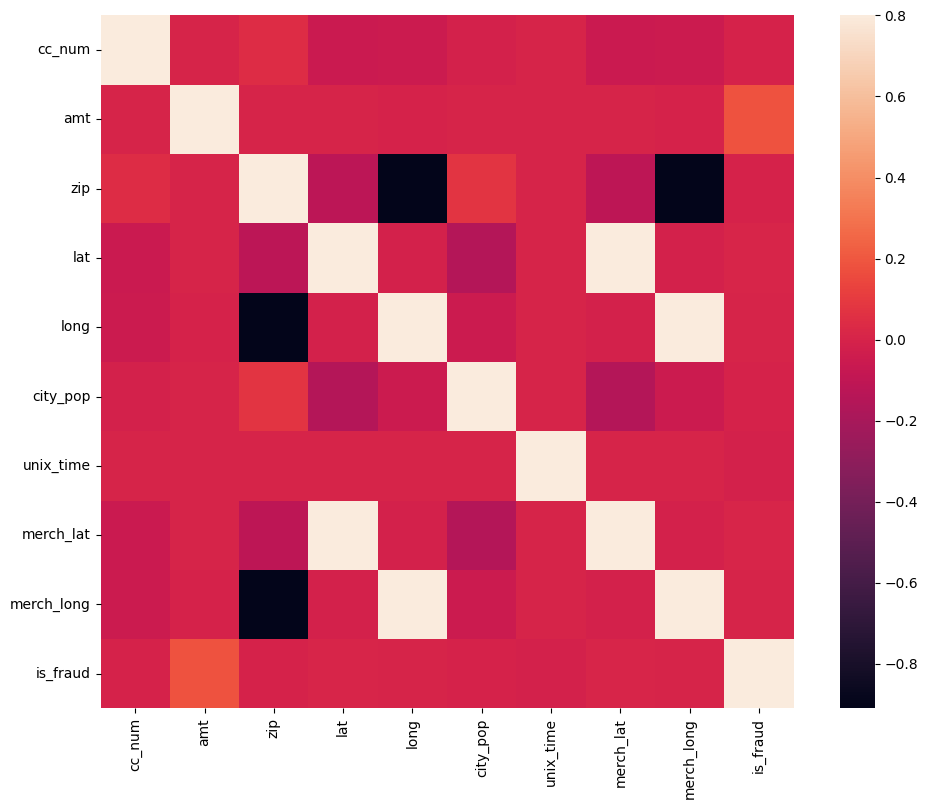

In [ ]:
corrmat = test_data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.show()

In [ ]:
# dividing the X and the Y from the dataset
X = train_data.drop(['is_fraud'], axis = 1)
Y = train_data["is_fraud"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
x = X.values
y = Y.values

(1296675, 21)
(1296675,)


In [ ]:
# dividing the X and the Y from the dataset
X = test_data.drop(['is_fraud'], axis = 1)
Y = test_data["is_fraud"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
x = X.values
y = Y.values

(555719, 21)
(555719,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# convert the 'Date' column to datetime format
fraud['trans_date_trans_time']= pd.to_datetime(fraud['trans_date_trans_time'])

<ipython-input-19-2cbe3f5ea3eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['trans_date_trans_time']= pd.to_datetime(fraud['trans_date_trans_time'])


In [ ]:
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"], infer_datetime_format=True)
train_data["dob"] = pd.to_datetime(train_data["dob"], infer_datetime_format=True)

In [ ]:
test_data["trans_date_trans_time"] = pd.to_datetime(test_data["trans_date_trans_time"], infer_datetime_format=True)
test_data["dob"] = pd.to_datetime(test_data["dob"], infer_datetime_format=True)

In [ ]:
train_data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
test_data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
if train_data.duplicated().sum() > 0:
    train_data.drop_duplicates(inplace=True)
    print('Duplicates dropped')
else:
    print('No Duplicates Exist')

No Duplicates Exist


In [ ]:
if test_data.duplicated().sum() > 0:
    test_data.drop_duplicates(inplace=True)
    print('Duplicates dropped')
else:
    print('No Duplicates Exist')

No Duplicates Exist


In [ ]:
print(train_data['gender'].value_counts())
train_data['gender'] = pd.Categorical(train_data['gender']).codes

F    709863
M    586812
Name: gender, dtype: int64


In [ ]:

print(test_data['gender'].value_counts())
test_data['gender'] = pd.Categorical(test_data['gender']).codes
test_data

F    304886
M    250833
Name: gender, dtype: int64


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,1,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,0,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,0,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,1,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,1,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,1,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,1,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,0,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,1,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [ ]:
from datetime import date

def calculate_age(row):
    today = date.today()
    return today.year - row['dob'].year - ((today.month, today.day) < (row['dob'].month, row['dob'].day))

# Train data
train_data['dob'] = pd.to_datetime(train_data['dob'])
train_data['age'] = train_data.apply(lambda row: calculate_age(row), axis=1)

# Test data
test_data['dob'] = pd.to_datetime(test_data['dob'])  # Corrected the typo here (pd.to_datetime)
test_data['age'] = test_data.apply(lambda row: calculate_age(row), axis=1)

print('Age of train dataset', train_data['age'].head(3))
print('Age of test dataset', test_data['age'].head(3))


Age of train dataset 0    35
1    45
2    61
Name: age, dtype: int64
Age of test dataset 0    55
1    34
2    53
Name: age, dtype: int64


In [ ]:
train_data['age'] = train_data['age'].astype(float)
train_data['city_pop'] = train_data['city_pop'].astype(float)
train_data['gender'] = train_data['gender'].astype(float)

In [ ]:
train_data.head(75442)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0.0,561 Perry Cove,Moravian Falls,...,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,35.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,0.0,43039 Riley Greens Suite 393,Orient,...,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,45.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,1.0,594 White Dale Suite 530,Malad City,...,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,61.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,1.0,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,57.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,1.0,408 Bradley Rest,Doe Hill,...,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75437,2019-02-13 23:30:47,630423337322,fraud_Friesen Inc,shopping_pos,6.02,Stephanie,Gill,0.0,43039 Riley Greens Suite 393,Orient,...,-118.2105,149.0,Special educational needs teacher,1978-06-21,17d904e02023424b4622d85b44e9fc80,1329175847,48.905652,-117.640307,0,45.0
75438,2019-02-13 23:31:15,6011492816282597,fraud_Morissette PLC,shopping_pos,9.65,Gary,Barnes,1.0,2970 Flores Brooks,Smackover,...,-92.7442,2501.0,Financial adviser,1986-06-11,d3985d278a6e55c2f56a22c1fcd40ef8,1329175875,33.538834,-91.935252,0,37.0
75439,2019-02-13 23:32:06,4210078554961359092,fraud_Smith-Stokes,misc_pos,51.02,Valerie,Clark,0.0,7402 West Ranch,Lowell,...,-122.7806,1420.0,Systems analyst,1965-11-11,64a3ec24826eb8617c7896429103f34f,1329175926,43.691838,-122.921076,1,58.0
75440,2019-02-13 23:32:14,4642255475285942,"fraud_Nienow, Barrows and Romaguera",personal_care,16.53,Sabrina,Johnson,0.0,320 Nicholson Orchard,Thompson,...,-109.6150,46.0,"Surveyor, minerals",1987-04-23,e20803b3426014f7ff893b3789935fa5,1329175934,39.207782,-110.014373,0,36.0


In [ ]:
X = train_data.drop(['is_fraud','cc_num', 'street', 'city', 'state', 'zip', 'lat', 'long','merch_lat','merch_long','trans_num','unix_time','dob','trans_date_trans_time','category','first','last','merchant','job'],axis = 1)
y = train_data['is_fraud']

In [ ]:
X = test_data.drop(['is_fraud','cc_num', 'street', 'city', 'state', 'zip', 'lat', 'long','merch_lat','merch_long','trans_num','unix_time','dob','job','trans_date_trans_time','category','first','last','merchant'],axis = 1)
y = test_data['is_fraud']

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# Apply SMOTE to oversample the minority class
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)
print("Data Type of X_train:", X_train.dtypes)
print("Data Type of y_train:", y_train.dtypes)

Data Type of X_train: amt         float64
gender         int8
city_pop      int64
age           int64
dtype: object
Data Type of y_train: int64


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train a logistic regression model
lg_model = LogisticRegression(random_state=42)
lg_model.fit(X_train_oversampled, y_train_oversampled)
# Predict probabilities
lg_yproba = lg_model.predict_proba(X_test)[:, 1]
# Set a lower threshold to reduce accuracy
threshold = 0.45  # You can adjust this threshold to achieve your desired accuracy level
# Adjust predictions based on the threshold
lg_ypred = (lg_yproba > threshold).astype(int)
# Evaluate performance
print("Accuracy score is: ", round(accuracy_score(y_test, lg_ypred) * 100, 2), '%')
print("Classification Report:\n", classification_report(y_test, lg_ypred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lg_ypred))

Accuracy score is:  87.65 %
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93    166072
           1       0.02      0.77      0.05       644

    accuracy                           0.88    166716
   macro avg       0.51      0.82      0.49    166716
weighted avg       1.00      0.88      0.93    166716

Confusion Matrix:
 [[145632  20440]
 [   151    493]]


In [ ]:
# Make predictions using the Logistic Regression model
lr_predictions = lg_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("LR", classification_report(y_test, lr_predictions))

LR               precision    recall  f1-score   support

           0       1.00      0.92      0.96    166072
           1       0.04      0.75      0.07       644

    accuracy                           0.92    166716
   macro avg       0.52      0.83      0.51    166716
weighted avg       1.00      0.92      0.96    166716



In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
# Ensure that lg_ypred is generated using X_test
lg_ypred = lg_model.predict(X_test)

# Evaluate performance for your logistic regression model
print("Logistic Regression")
print(classification_report(y_test, lg_ypred))
print("ROC-AUC:", roc_auc_score(y_test, lg_ypred))


Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    166072
           1       0.04      0.75      0.07       644

    accuracy                           0.92    166716
   macro avg       0.52      0.83      0.51    166716
weighted avg       1.00      0.92      0.96    166716

ROC-AUC: 0.8341690605496561
